## 1. Dataset加载数据

In [5]:
from torch.utils.data import Dataset
import os
from PIL import Image

In [6]:
# 通过继承Dataset来获取单条数据
class MyData(Dataset):
    
    def __init__(self, folder_name, label_name):
        self.folder_name = folder_name
        self.label_name = label_name
        self.data_path = os.path.join(folder_name, label_name)
        self.data_list = os.listdir(self.data_path)
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.folder_name, self.label_name, self.data_list[idx])
        img = Image.open(img_path)
        label = self.label_name
    
        return img, label
    
    def __len__(self):
        return len(self.data_list)

In [9]:
folder_name = 'F:\\AllOfComputerKnoledge\\MachineLearning\\Pytorch\\data\\hymenoptera_data\\train'
ants_label_name = 'ants'

In [10]:
ants_data = MyData(folder_name, ants_label_name)

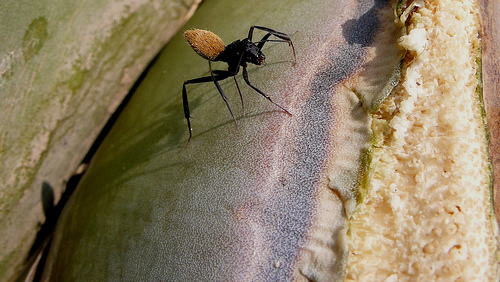

In [11]:
ants_data[2][0]

In [12]:
bees_label_name = 'bees'
bees_data = MyData(folder_name, bees_label_name)

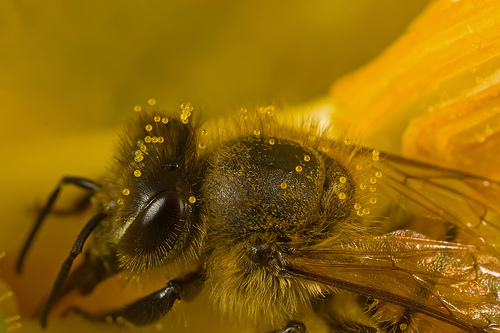

In [13]:
bees_data[1][0]

In [14]:
# 数据集拼接
train_data = ants_data + bees_data

In [15]:
len(train_data) 

245

In [16]:
len(train_data) == len(ants_data) + len(bees_data)

True

## 2. TensorBoard使用

In [17]:
import torch
from torch.utils.tensorboard import SummaryWriter

In [27]:
writer = SummaryWriter("./logs")
# 记录loss
for i in range(100):
    writer.add_scalar("y=x**2", i**2, i)
    

In [28]:
print(type(ants_data[0][0]))

from torchvision import transforms

toTensor = transforms.ToTensor()
tensor_img = toTensor(ants_data[0][0])

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [29]:
# 图片类型为numpy array, torch tensor, or caffe2 blob name are expected.
writer.add_image('Train', tensor_img, 0)

## 3. Transform 对图片进行转化

In [30]:
from torchvision import transforms

image_pil type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


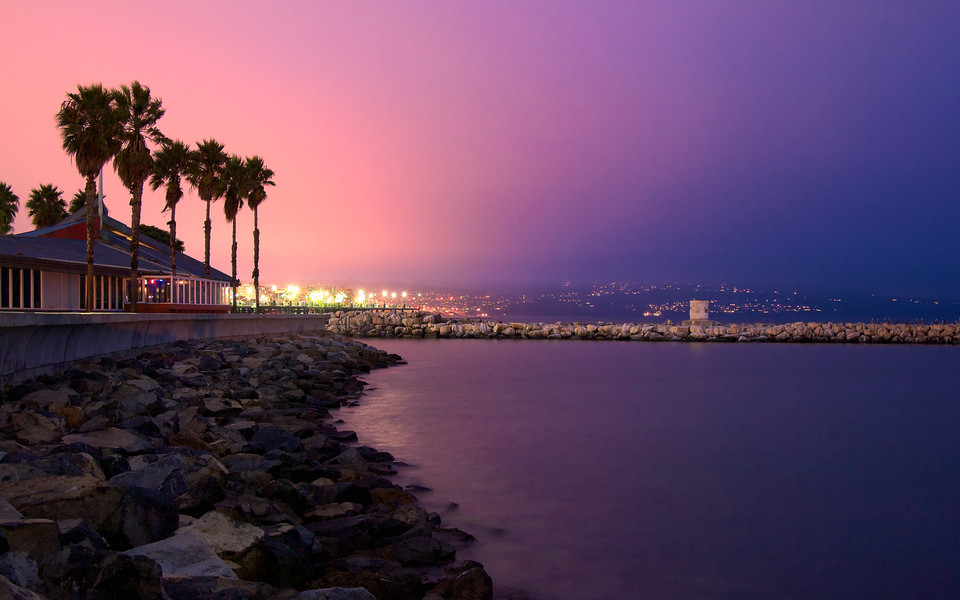

In [35]:
image_path = './data/Image/see.jpg'
image_pil = Image.open(image_path)
print("image_pil type: " + str(type(image_pil)))
image_pil

**A.转化为tensor类型**：

In [41]:
# 转换成tensor
to_tensor = transforms.ToTensor()
image_tensor = to_tensor(image_pil)
print("image_tensor type: " + str(type(image_tensor)))
image_tensor

image_tensor type: <class 'torch.Tensor'>


tensor([[[0.9725, 0.9725, 0.9725,  ..., 0.3059, 0.3020, 0.2980],
         [0.9725, 0.9725, 0.9725,  ..., 0.3059, 0.3020, 0.2980],
         [0.9686, 0.9686, 0.9725,  ..., 0.3020, 0.2980, 0.2980],
         ...,
         [0.1725, 0.1804, 0.1843,  ..., 0.0667, 0.0745, 0.0863],
         [0.1647, 0.1765, 0.1804,  ..., 0.0706, 0.0706, 0.0863],
         [0.1529, 0.1686, 0.1765,  ..., 0.0745, 0.0706, 0.0784]],

        [[0.6078, 0.6078, 0.6078,  ..., 0.2863, 0.2824, 0.2784],
         [0.6078, 0.6078, 0.6078,  ..., 0.2824, 0.2784, 0.2745],
         [0.6039, 0.6039, 0.6078,  ..., 0.2784, 0.2745, 0.2745],
         ...,
         [0.1373, 0.1451, 0.1529,  ..., 0.0627, 0.0706, 0.0824],
         [0.1294, 0.1412, 0.1451,  ..., 0.0667, 0.0667, 0.0706],
         [0.1294, 0.1451, 0.1529,  ..., 0.0706, 0.0667, 0.0627]],

        [[0.6392, 0.6392, 0.6392,  ..., 0.5490, 0.5451, 0.5412],
         [0.6392, 0.6392, 0.6392,  ..., 0.5569, 0.5529, 0.5490],
         [0.6353, 0.6353, 0.6392,  ..., 0.5529, 0.5490, 0.

In [42]:
# 使用opencv读取图片
import cv2
image_cv = cv2.imread(image_path)
print("image_cv type: " + str(type(image_cv)))
image_cv


image_cv type: <class 'numpy.ndarray'>


array([[[163, 155, 248],
        [163, 155, 248],
        [163, 155, 248],
        ...,
        [140,  73,  78],
        [139,  72,  77],
        [138,  71,  76]],

       [[163, 155, 248],
        [163, 155, 248],
        [163, 155, 248],
        ...,
        [142,  72,  78],
        [141,  71,  77],
        [140,  70,  76]],

       [[162, 154, 247],
        [162, 154, 247],
        [163, 155, 248],
        ...,
        [141,  71,  77],
        [140,  70,  76],
        [140,  70,  76]],

       ...,

       [[ 38,  35,  44],
        [ 38,  37,  46],
        [ 37,  39,  47],
        ...,
        [ 48,  16,  17],
        [ 50,  18,  19],
        [ 53,  21,  22]],

       [[ 36,  33,  42],
        [ 39,  36,  45],
        [ 38,  37,  46],
        ...,
        [ 49,  17,  18],
        [ 49,  17,  18],
        [ 51,  18,  22]],

       [[ 35,  33,  39],
        [ 39,  37,  43],
        [ 39,  39,  45],
        ...,
        [ 50,  18,  19],
        [ 49,  17,  18],
        [ 49,  16,  20]]

**B. Normalize归一化**：

In [47]:
trans_norm = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 5])
# imag_norm = trans_norm(image_pil) 
# img should be Tensor Image. Got <class 'PIL.JpegImagePlugin.JpegImageFile'>
image_norm = trans_norm(image_tensor)
writer = SummaryWriter('logs')
writer.add_image('image_tensor', image_tensor, 0)
writer.add_image('image_norm', image_norm, 0)

**C. Resize**:

In [48]:
trans_resize = transforms.Resize((500, 1000))
image_resize = trans_resize(image_tensor)

writer.add_image('image_resize', image_resize, 0)

E:\software2\Anaconda\envs\pytorchEnv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


**D. Randomsize**:

In [50]:
trans_random_crop = transforms.RandomCrop(50, 50)
for i in range(10):
    image = trans_random_crop(image_tensor)
    writer.add_image('image_random_crop', image, i)
    

**E. Compose**:

In [51]:
trans_compose = transforms.Compose([trans_norm, trans_resize])
image_compose = trans_compose(image_tensor)
writer.add_image('image_compose', image_compose, 0)

E:\software2\Anaconda\envs\pytorchEnv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


## 使用pytorch标准数据集

In [52]:
import torchvision
download_path = './data/'
train_set = torchvision.datasets.CIFAR10(root=download_path, train=True, download=True)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>